# Mortgage Amortization plots

This notebook makes use of the mortgage class I wrote to compute monthly paymens to interest and principal over a life of a loan given the loan amount, rate and either the monthly payment amount of months to pay the loan

In [134]:
import numpy as np
import sys,os
local_module_path = os.path.abspath(os.getcwd()) 
if local_module_path not in sys.path:
    sys.path.append(local_module_path)
#import morgage.py module form mortgage package
from mortgage import mortgage as mg
from IPython.display import display, Math, Latex

# Total payments at 4.25% interest rate for 30 years.

Austin's median listed price as of November of 2017 is $389,900 [You can check current listed values](https://www.zillow.com/austin-tx/home-values/)

In [135]:
total_price = 389900
#Assume %10 down payment and 30 year loan with 4.25 interest rate
down_percent = .1
principal = total_price*(1 - down_percent) #principal
rate = 0.0425 #rate
loan_months = 360 #number of payments
mortgage1 = mg.Mortgage.calculatePayment(principal, rate, loan_months)
total_interest = mortgage1.total_int(); total_principal = mortgage1.total_princ()
total_payments = total_interest +  total_principal
print('Loan amount: {:.2f}'.format(principal))
print('Total loan payment: {:.2f}'.format(total_payments))
print('Total loan principal: {:.2f}'.format(total_principal))
print('Total loan interest: {:.2f}'.format(total_interest))
print('Percent of loan that you pay in interests: %{:.2f}'\
      .format(100*(total_interest/principal)))
print('Monthly payments: {:.2f}'.format(mortgage1.payment))

Loan amount: 350910.00
Total loan payment: 621455.86
Total loan principal: 350910.00
Total loan interest: 270545.86
Percent of loan that you pay in interests: %77.10
Monthly payments: 1726.27


## Principal and interest contribution for each month

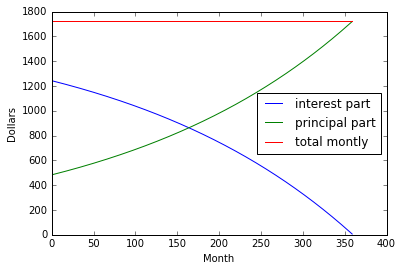

In [136]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot((mortgage1.monthly_int_part()), label='interest part')
plt.plot((mortgage1.monthly_prin_part()), label='principal part')
plt.plot((mortgage1.monthly_int_part() + mortgage1.monthly_prin_part()), label='total montly')
#plt.plot(mortgage1.total() * np.ones(len(mortgage1.monthly_prin_part())))
plt.ylabel('Dollars')
plt.xlabel('Month')
plt.legend(loc='best')

plt.show()

## Cummulative interest and principal payment over the life of the loan

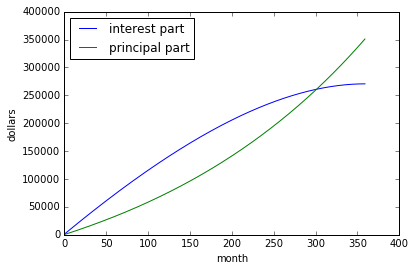

In [137]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.cumsum(mortgage1.monthly_int_part()), label='interest part')
plt.plot(np.cumsum(mortgage1.monthly_prin_part()), label='principal part')
#plt.plot(mortgage1.total() * np.ones(len(mortgage1.monthly_prin_part())))
plt.ylabel('dollars')
plt.xlabel('month')
plt.legend(loc='best')

plt.show()

# Different rates comparisions

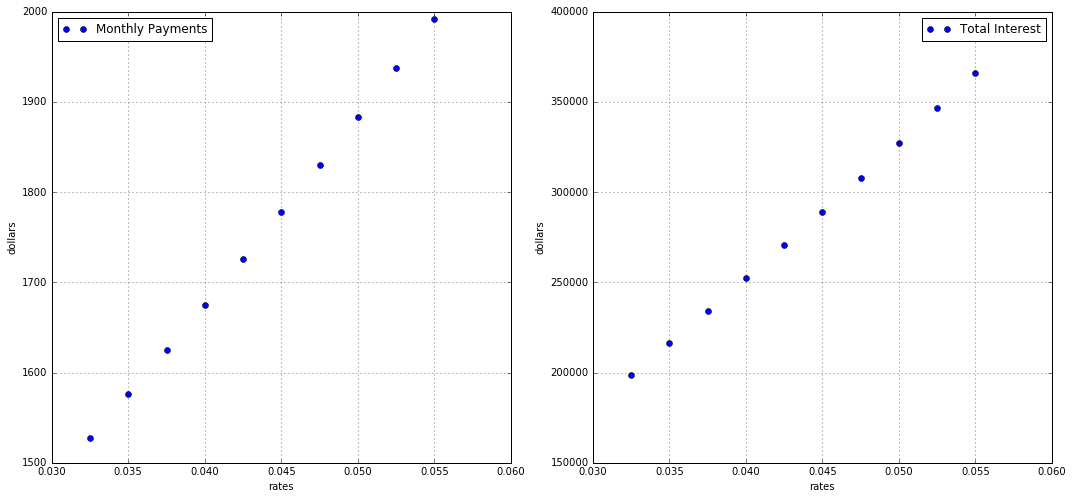

In [138]:
total_price = 389900
#Assume %10 down payment and 30 year
down_percent = .1
principal = total_price*(1 - down_percent) #principal
loan_months = 360 
rates = np.arange(.0325, .0575, .0025)
mortgages = [mg.Mortgage.calculatePayment(principal, rate, loan_months) for rate in rates]
loan_interests = [mortgage.total_int() for mortgage in mortgages]
monthly_payments = [mortgage.payment for mortgage in mortgages]

fig = plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(rates, monthly_payments, 'bo', label='Monthly Payments')
plt.ylabel('dollars')
plt.xlabel('rates')
plt.grid()
plt.legend(loc='best')
plt.subplot(122)
plt.plot(rates, loan_interests, 'bo', label='Total Interest')
plt.ylabel('dollars')
plt.xlabel('rates')
plt.grid()
plt.legend(loc='best')

plt.tight_layout()

plt.show()


## Savings if purchaser pays 100 extra per month (towards principal)

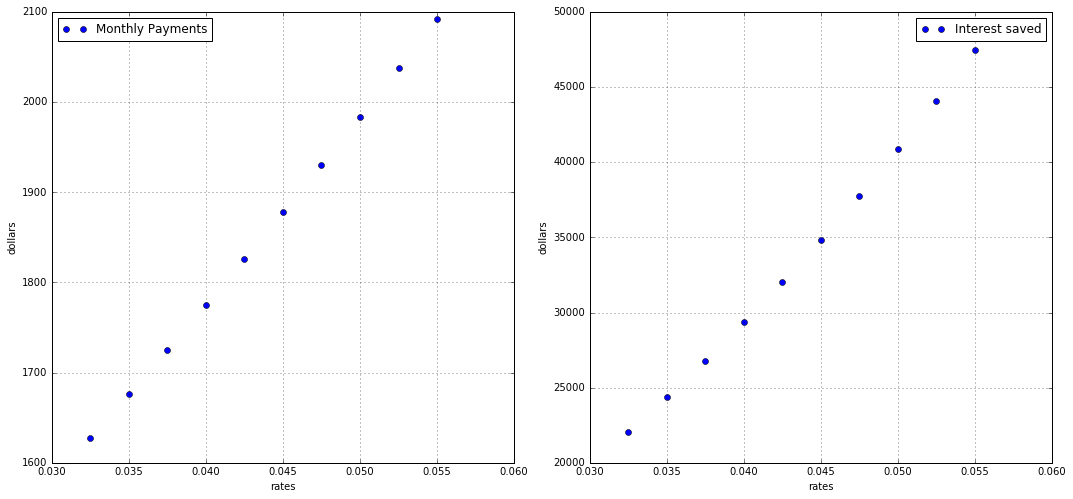

In [139]:
#make a list of total loan interest for given rates if we pay 150 dollars more than montly payment
#make a list of montly payments and total loan interest vs rates
total_price = 389900
#Assume %10 down payment and 30 year
down_percent = .1
principal = total_price*(1 - down_percent) #principal
loan_months = 360 
rates = np.arange(.0325, .0575, .0025)
mortgages = [mg.Mortgage.calculatePayment(principal, rate, loan_months) for rate in rates]
extra_payment_mortgage = [mg.Mortgage(principal, rates[i], mortgages[i].payment + 100)\
                          for i in range(len(rates))]
new_loan_interests = [mortgage.total_int() for mortgage in extra_payment_mortgage]
old_loan_interest = [mortgage.total_int() for mortgage in mortgages]
new_monthly_payments = [mortgage.payment for mortgage in extra_payment_mortgage]
diff_interest  = np.array(old_loan_interest) - np.array(new_loan_interests)

fig = plt.figure(figsize=(15,7))
plt.subplot(121)
plt.plot(rates, new_monthly_payments, 'bo', label='Monthly Payments')
plt.ylabel('dollars')
plt.xlabel('rates')
plt.grid()
plt.legend(loc='best')
plt.subplot(122)
plt.plot(rates, diff_interest, 'bo', label='Interest saved')
plt.ylabel('dollars')
plt.xlabel('rates')
plt.grid()
plt.legend(loc='best')

plt.tight_layout()

plt.show()

# Savings as function of initial principal and interest

 * 10% down assumption
 * 30 year loan

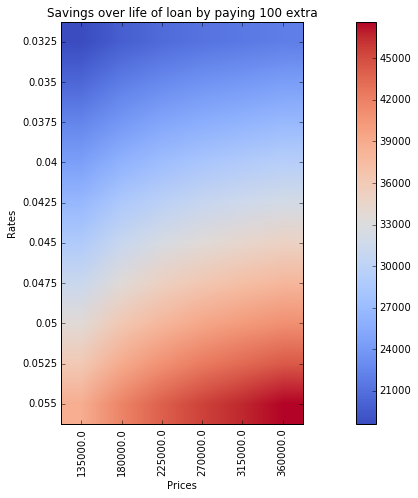

In [140]:
rates = np.arange(.0325, .0575, .0025)
prices = np.arange(150000., 400001., 50000.)
principals = prices - 0.1*prices
loan_months = 360 
mortgages = [mg.Mortgage.calculatePayment(principal, rate, loan_months)\
             for rate in rates for principal in principals]
extra_payment = [mg.Mortgage(mortgage.total_princ(), mortgage.anual_rate, mortgage.payment + 100)\
                for mortgage in mortgages]
old_loan_interest = [mortgage.total_int() for mortgage in mortgages]
new_loan_interests = [mortgage.total_int() for mortgage in extra_payment]
diff_interest  = np.array(old_loan_interest) - np.array(new_loan_interests)
diff_interest = diff_interest.reshape(len(rates), len(prices))

fig = plt.figure(figsize=(15,7))


plt.imshow(diff_interest, cmap=plt.cm.coolwarm)
plt.title('Savings over life of loan by paying 100 extra')
plt.xlabel('Prices')
plt.ylabel('Rates')
plt.yticks(np.arange(len(rates)), rates)
plt.xticks(np.arange(len(principals)), principals, rotation='vertical')
plt.colorbar()
plt.tight_layout()
plt.show()

The higher your loan and rates are the more money you save. The calculations above help to determine exaclty how much money is saved.